### 1. 라이브러리 & 데이터 리딩

In [39]:
# 수치화를 위한 라이브러리 
import pandas as pd 
import numpy as np 

# 시각화를 위한 라이브러리 
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# 한글 깨짐 방지
from matplotlib import rc
rc('font', family ='AppleGothic')

In [41]:
df = pd.read_csv('data-3/customer_data.csv', sep='\t') # 쉼표가 아닌, tab으로 구분 되어있음

# pd.set_option('display.max_columns', None)
# 생략되는 칼럼 없이 보여줌 

df.head()

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,...,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,...,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,...,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,...,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,...,5,6,5,0,0,0,0,0,0,11


In [42]:
df.columns.tolist()

['ID',
 'signup_ym',
 'birth_year',
 'annual_income',
 'marital_status',
 'children',
 'recency',
 'amount_alcohol',
 'amount_fruit',
 'amount_meat',
 'amount_fish',
 'amount_snack',
 'amount_general',
 'num_purchase_web',
 'num_purchase_store',
 'num_purchase_discount',
 'promotion_1',
 'promotion_2',
 'promotion_3',
 'promotion_4',
 'promotion_5',
 'promotion_6',
 'revenue']

### 2. 결측치 및 칼럼처리

In [43]:
# 데이터 크기 확인 
df.shape

(2240, 23)

#### 2.1 결측치 확인

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2240 non-null   int64  
 1   signup_ym              2240 non-null   object 
 2   birth_year             2240 non-null   int64  
 3   annual_income          2216 non-null   float64
 4   marital_status         2240 non-null   object 
 5   children               2240 non-null   int64  
 6   recency                2240 non-null   int64  
 7   amount_alcohol         2240 non-null   int64  
 8   amount_fruit           2240 non-null   int64  
 9   amount_meat            2240 non-null   int64  
 10  amount_fish            2240 non-null   int64  
 11  amount_snack           2240 non-null   int64  
 12  amount_general         2240 non-null   int64  
 13  num_purchase_web       2240 non-null   int64  
 14  num_purchase_store     2240 non-null   int64  
 15  num_

- annual income에 결측치가 존재함

In [45]:
df.isnull().sum()

ID                        0
signup_ym                 0
birth_year                0
annual_income            24
marital_status            0
children                  0
recency                   0
amount_alcohol            0
amount_fruit              0
amount_meat               0
amount_fish               0
amount_snack              0
amount_general            0
num_purchase_web          0
num_purchase_store        0
num_purchase_discount     0
promotion_1               0
promotion_2               0
promotion_3               0
promotion_4               0
promotion_5               0
promotion_6               0
revenue                   0
dtype: int64

- annual_income에 24개의 null 값 존재. 
- 분석과정 이전에 처리 필요!

#### 2.2 annual_income의 결측치 처리
- 240개의 데이터중에 24개만 결측치
- 결측치 데이터를 삭제하는 것으로 결정 

In [46]:
df = df.dropna()
df.isnull().sum()

ID                       0
signup_ym                0
birth_year               0
annual_income            0
marital_status           0
children                 0
recency                  0
amount_alcohol           0
amount_fruit             0
amount_meat              0
amount_fish              0
amount_snack             0
amount_general           0
num_purchase_web         0
num_purchase_store       0
num_purchase_discount    0
promotion_1              0
promotion_2              0
promotion_3              0
promotion_4              0
promotion_5              0
promotion_6              0
revenue                  0
dtype: int64

- 결측치가 지워졌음을 확인할 수 있음

#### 2.3 object_cols의 unique값 확인하기

In [47]:
object_cols = df.columns[df.dtypes == 'object']
object_cols

Index(['signup_ym', 'marital_status'], dtype='object')

In [48]:
def unique_val(df):
    object_cols = df.columns[df.dtypes == 'object'] # object인 col 저장 
    
    for col in object_cols:
        print(f'{col}의 unique값 갯수: {df[col].nunique()}개')
        print(sorted(df[col].unique()),'\n')

In [49]:
unique_val(df)

signup_ym의 unique값 갯수: 24개
['2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09'] 

marital_status의 unique값 갯수: 4개
['미혼', '배우자 있음', '사별', '이혼'] 


- 2020년: 10월 ~ 12월 
- 2021년: 1월 ~ 12월 
- 2022년: 1월 ~ 9월
의 데이터 값 존재 

#### 2.4 age 칼럼 추가하기

In [50]:
# datetime라이브러리로 올해의 연도 추출하기 
import datetime
year = datetime.datetime.today().year

df['birth_year'] = year - df['birth_year']
df = df.rename(columns={'birth_year':'age'})


In [51]:
df.head()

,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,59,75579400.0,미혼,0,58,825500,114400,709800,...,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,62,60247200.0,미혼,2,38,14300,1300,7800,...,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,51,93096900.0,배우자 있음,0,26,553800,63700,165100,...,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,32,34639800.0,배우자 있음,1,26,14300,5200,26000,...,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,35,75780900.0,배우자 있음,1,94,224900,55900,153400,...,5,6,5,0,0,0,0,0,0,11


- birth_year 대신에 age 칼럼을 추가함

#### 2.5 구매 금액 합계 및 구매 횟수 칼럼 


In [52]:
data_amount_total = (df['amount_alcohol'] +
                      df['amount_fruit'] +
                      df['amount_meat']+
                      df['amount_fish']+
                      df['amount_snack'] +
                      df['amount_general'])
df.head()

,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,59,75579400.0,미혼,0,58,825500,114400,709800,...,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,62,60247200.0,미혼,2,38,14300,1300,7800,...,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,51,93096900.0,배우자 있음,0,26,553800,63700,165100,...,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,32,34639800.0,배우자 있음,1,26,14300,5200,26000,...,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,35,75780900.0,배우자 있음,1,94,224900,55900,153400,...,5,6,5,0,0,0,0,0,0,11


amount_total 칼럼의 위치 옮기기

In [53]:
df.insert((df.columns.get_loc('amount_general')+1),'amount_total', data_amount_total )
# insert 함수 활용 
df.head()

,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,59,75579400.0,미혼,0,58,825500,114400,709800,...,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,62,60247200.0,미혼,2,38,14300,1300,7800,...,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,51,93096900.0,배우자 있음,0,26,553800,63700,165100,...,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,32,34639800.0,배우자 있음,1,26,14300,5200,26000,...,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,35,75780900.0,배우자 있음,1,94,224900,55900,153400,...,5,6,5,0,0,0,0,0,0,11


- amount_general옆에 amount_total 칼럼이 추가된 것을 확인할 수 있음

In [54]:
# purchase total 칼럼 만들기 
data_purchase_total = (df['num_purchase_discount']+
                       df['num_purchase_store']+
                       df['num_purchase_discount'])

In [55]:
df.insert((df.columns.get_loc('num_purchase_discount')+1), 'num_purchase_total', data_purchase_total)
df.head()

,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,59,75579400.0,미혼,0,58,825500,114400,709800,...,4,3,10,0,0,0,0,0,1,11
1,2174,2022-06,62,60247200.0,미혼,2,38,14300,1300,7800,...,2,2,6,0,0,0,0,0,0,11
2,4141,2021-11,51,93096900.0,배우자 있음,0,26,553800,63700,165100,...,10,1,12,0,0,0,0,0,0,11
3,6182,2022-05,32,34639800.0,배우자 있음,1,26,14300,5200,26000,...,4,2,8,0,0,0,0,0,0,11
4,5324,2022-04,35,75780900.0,배우자 있음,1,94,224900,55900,153400,...,6,5,16,0,0,0,0,0,0,11


- num_purchase_total 칼럼 추가 

#### 2.6 불필요한 칼럼 제거하기
- revene 칼럼은 모든 데이터 행에 동일한 값 -> 의미 없음 -> 삭제
- ID, 수치화 시각화하는데 큰 의미 차지x, index와 동일한 역할 -> 삭제 

In [56]:
df = df.drop(columns = ['ID', 'revenue'])
df.head()

,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,...,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
0,2020-12,59,75579400.0,미혼,0,58,825500,114400,709800,223600,...,8,4,3,10,0,0,0,0,0,1
1,2022-06,62,60247200.0,미혼,2,38,14300,1300,7800,2600,...,1,2,2,6,0,0,0,0,0,0
2,2021-11,51,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,...,8,10,1,12,0,0,0,0,0,0
3,2022-05,32,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,...,2,4,2,8,0,0,0,0,0,0
4,2022-04,35,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,...,5,6,5,16,0,0,0,0,0,0


### 3. 데이터 분석

#### 3.1 인구통계학적 고객 정보 분석 
- 나이 분포 파악하기
- 연 소득 분포 파악하기 

##### 3.1.1 나이분포 파악하기

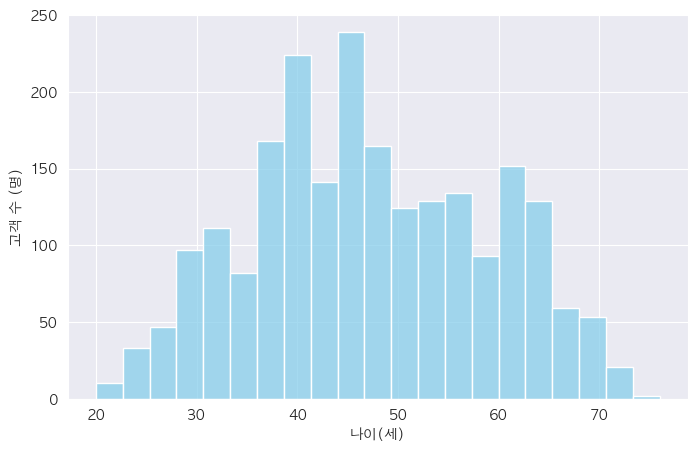

In [57]:
df = df[df['age'] < 100]
plt.figure(figsize = (8,5))
sns.histplot(data=df['age'], color='skyblue', edgecolor= 'white')
plt.xlabel('나이(세)')
plt.ylabel('고객 수 (명)')
plt.show()

- 100세 이하의 데이터만 처리 
- 40대가 가장 많은 분포를 차지함 
- 20대, 70대로 갈수록 고객 수가 적어짐 

지금의 age 컬럼은 고객의 나이가 담긴 정수형 데이터인데요. 19세부터 75세까지 워낙 다양하게 분포되어 있어 개별 나이를 기준으로 고객을 분석하기는 어렵습니다. 나이를 10년 단위로 묶어 연령대 데이터로 바꿔 주면 각 연령대마다 경향이나 특성을 파악하고 분석하기 쉬워질 거예요. 이렇게 연속적인 데이터를 특정 구간으로 나누어 범주형 데이터로 바꾸는 과정을 데이터 구간화(Binning)라고 합니다. 데이터를 구간화할 때 자주 사용되는 함수로는 cut()이 있어요. cut() 함수를 이용하면 사용자가 지정한 구간대로 데이터를 나눌 수 있죠.
현재 데이터에는 고객 나이가 19세부터 75세까지 분포되어 있으니 연령대는 10대부터 70대까지 존재할 겁니다. 이때 10대는 10세 이상 20세 미만, 20대는 20세 이상 30세 미만, 그리고 70대는 70세 이상 80세 미만을 뜻하고요. 이렇게 나눈 구간을 리스트로 표현하여 age_bins라는 변수에 먼저 넣어 주겠습니다.

In [58]:
age_bins = list(range(10, 81, 10))
age_bins 

[10, 20, 30, 40, 50, 60, 70, 80]

In [59]:
# age_labels 만들기 
age_labels = [f'{x}대' for x in age_bins[:-1]]
age_labels

['10대', '20대', '30대', '40대', '50대', '60대', '70대']

In [60]:
#ge_group = pd.cut(x=customer_df['age'], bins=age_bins, labels=age_labels, right=False)
age_group = pd.cut(x = df['age'], bins = age_bins, labels = age_labels, right=False)

In [61]:
# 칼럼에 추가하기 
df.insert((df.columns.get_loc('age')+1), 'age_group', age_group)

In [62]:
df.head()

,signup_ym,age,age_group,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
0,2020-12,59,50대,75579400.0,미혼,0,58,825500,114400,709800,...,8,4,3,10,0,0,0,0,0,1
1,2022-06,62,60대,60247200.0,미혼,2,38,14300,1300,7800,...,1,2,2,6,0,0,0,0,0,0
2,2021-11,51,50대,93096900.0,배우자 있음,0,26,553800,63700,165100,...,8,10,1,12,0,0,0,0,0,0
3,2022-05,32,30대,34639800.0,배우자 있음,1,26,14300,5200,26000,...,2,4,2,8,0,0,0,0,0,0
4,2022-04,35,30대,75780900.0,배우자 있음,1,94,224900,55900,153400,...,5,6,5,16,0,0,0,0,0,0


In [63]:
# 나잇대 별 value_counts 
df.value_counts(df['age_group'])

age_group
40대    717
50대    480
30대    454
60대    377
20대    146
70대     39
10대      0
dtype: int64

아무래도 10대와 70대의 숫자가 너무 적은 것 같네요. 이렇게 특정 연령대에서 표본의 수가 너무 적으면 해당 연령대에 대한 통계 수치의 신뢰성이 떨어지고 분석 결과 역시 왜곡되기 쉽습니다. 그래서 10대와 20대를 20대 이하로, 60대와 70대를 60대 이상으로 바꾸어 연령대 값을 새롭게 구해 줄게요.
이렇게 데이터 내 특정 값을 다른 값으로 바꾸고 싶을 때에는 replace() 함수를 이용하면 됩니다. 이때 replace() 함수에 값을 어떻게 바꿀지 입력해야 하는데요. 지금처럼 바꾸고자 하는 값이 여럿일 경우에는 변경 사항을 딕셔너리로 나타내면 좋아요. 딕셔너리의 키에는 기존 값을, 키에 대응하는 밸류에는 새로운 값을 넣어 알맞게 짝 지어 주세요. 그다음 age_group 컬럼 데이터에 대해 replace() 함수를 호출하고 그 결과를 age_group 컬럼으로 다시 넣어 줍시다.

In [64]:
# 10대, 70대의 데이터 수가 적어서 bin 통합하기
# 10대 + 20대 -> 20대 이하 
# 70대 + 60대 -> 60대 이상 
age_group_replace = { 
    '10대': "20대 이하",
    '20대': '20대 이하',
    '70대': "60대 이상",
    "60대": "60대 이상"
}
df['age_group'] = df['age_group'].replace(age_group_replace)

df.head()

,signup_ym,age,age_group,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
0,2020-12,59,50대,75579400.0,미혼,0,58,825500,114400,709800,...,8,4,3,10,0,0,0,0,0,1
1,2022-06,62,60대 이상,60247200.0,미혼,2,38,14300,1300,7800,...,1,2,2,6,0,0,0,0,0,0
2,2021-11,51,50대,93096900.0,배우자 있음,0,26,553800,63700,165100,...,8,10,1,12,0,0,0,0,0,0
3,2022-05,32,30대,34639800.0,배우자 있음,1,26,14300,5200,26000,...,2,4,2,8,0,0,0,0,0,0
4,2022-04,35,30대,75780900.0,배우자 있음,1,94,224900,55900,153400,...,5,6,5,16,0,0,0,0,0,0


In [65]:
df['age_group'].value_counts().sort_values(ascending=True)

20대 이하    146
60대 이상    416
30대       454
50대       480
40대       717
Name: age_group, dtype: int64

- 분포와 비슷하게 20대 이하가 가장 적고 40대가 가장 많음 

##### 3.1.2 연소득 분포 파악하기 
- 이번에는 고객 연 소득 분포를 살펴볼게요. 나이 분포 때와 마찬가지로 seaborn의 histplot()을 이용하면 한눈에 확인할 수 있겠죠. 이번에도 그래프 크기와 제목, 그리고 X축과 Y축의 이름까지 설정하겠습니다. 

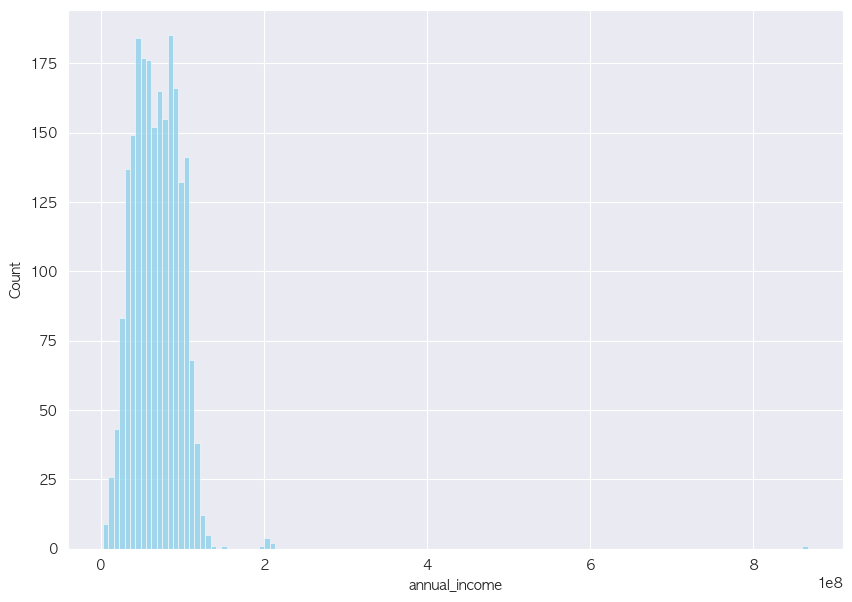

In [66]:
plt.figure(figsize=(10,7))
sns.histplot(data = df['annual_income'], color = 'skyblue')

plt.show()

<AxesSubplot:xlabel='annual_income'>

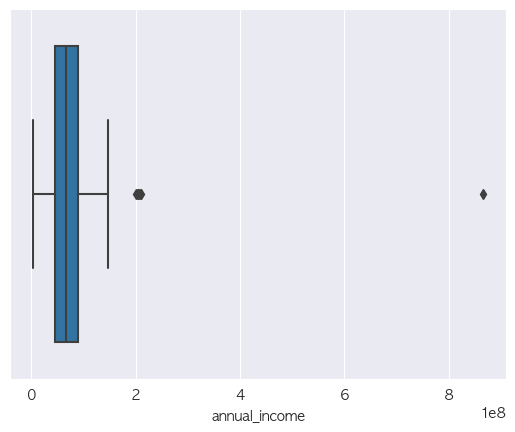

In [67]:
sns.boxplot(data = df, x='annual_income')

- 이상치가 존재함 
- 제거하자!

iqr로 조작하기

In [68]:
income = df['annual_income']
q1 = income.quantile(q=0.25)
q3 = income.quantile(q=0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

normal_condition = (lower_bound <= income) & (income <= upper_bound)
df = df[normal_condition]

<AxesSubplot:xlabel='annual_income'>

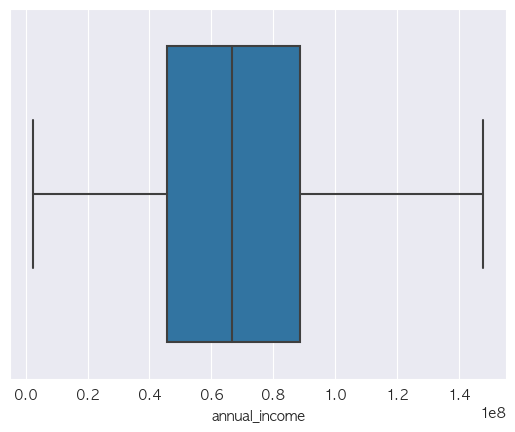

In [69]:
sns.boxplot(data = df, x='annual_income')

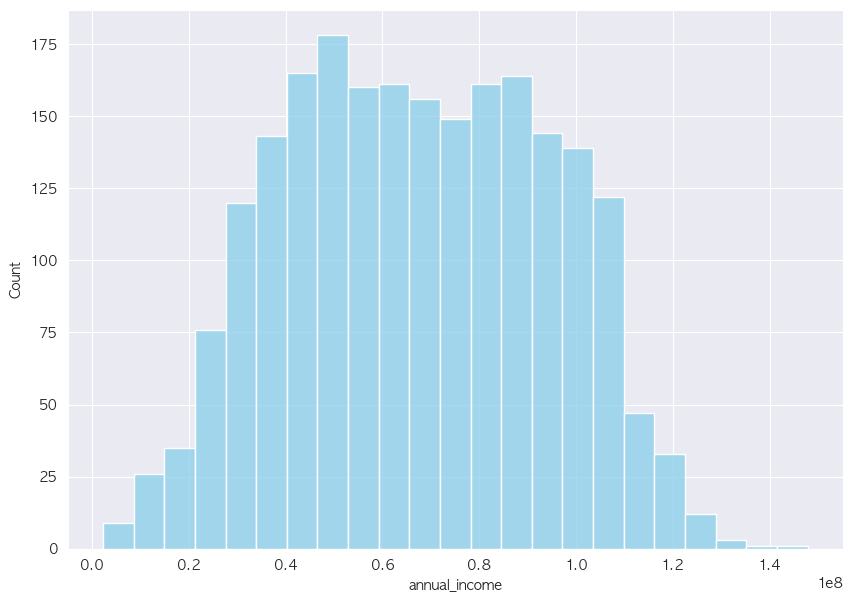

In [70]:
plt.figure(figsize=(10,7))
sns.histplot(data = df['annual_income'], color = 'skyblue')

plt.show()

#### 3.2 RFM 고객 세그먼트 분류

##### 3.2.1 Recency, Frequency, Monetary 등급 매기기
- Recency 등급의 숫자는 클수록 더 최근에 구매했다는 뜻
- Frequency 등급의 숫자는 클수록 더 자주 구매했다는 뜻 
- Monetary 등급의 숫자는 클수록 돈을 더 많이 썼다는 뜻 

In [71]:
# 등급 넘버 선언언하기
number_grades = 3

In [72]:
grade_labels = list(range(1, number_grades+1))
grade_labels

[1, 2, 3]

Recency

In [73]:
recency_grade = pd.qcut(x=df['recency'], q=number_grades, labels=grade_labels[::-1])
df['recency_grade'] = recency_grade

In [74]:
df['recency_grade'].value_counts()

3    752
1    730
2    723
Name: recency_grade, dtype: int64

- 1,2,3 등급의 수 비슷함  

In [75]:
gropubyrecency = df.groupby('recency_grade').sum().reset_index()
gropubyrecency

,recency_grade,age,annual_income,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,...,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
0,3,35078,5.059218e+10,678,11988,293945600,26728000,157576900,37583000,25539800,...,3103,4386,1693,7772,54,12,67,55,60,179
1,2,34460,4.818995e+10,724,35840,294073000,23675600,151742500,35046700,25147200,...,2992,4240,1771,7782,47,8,47,52,48,95
2,1,34308,4.919261e+10,690,60237,289602300,25281100,164547500,35599200,27076400,...,2947,4215,1648,7511,41,10,49,57,53,59


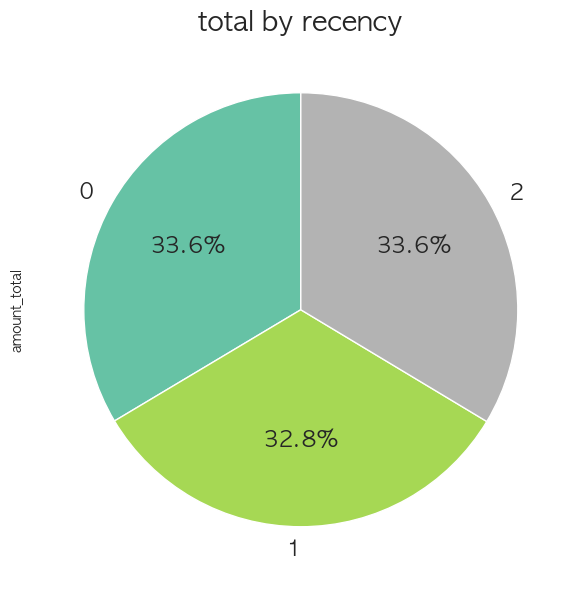

In [76]:
plt.figure(figsize = (7,8))
gropubyrecency['amount_total'].plot.pie(autopct = '%1.1f%%', startangle = 90, cmap = "Set2", fontsize=16)
plt.title("total by recency",  fontsize=20)
plt.show()